In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic

In [2]:
data = pd.read_csv('./Samara_flat_data9.csv', index_col=0)

In [3]:
data = data.drop('URL',axis=1)

In [4]:
data.head()

,id,Цена,Цена за кв.метр,Количество собственников,Район,Улица,Вид сделки,Количество комнат,Общая площадь,Площадь кухни,...,В доме,Двор,Парковка,Дополнительно,Тип комнат,Мебель,Тип продавца,Data_added,latitude,longitude
0,4060193320,7535490.0,163106.0,Группа компаний «ВИРА»,NaN,"ул. Санфировой, д. 95В",NaN,1,46.2,18.4,...,NaN,NaN,NaN,NaN,NaN,NaN,агентство,2025-05-05,53.219721,50.194966
1,4059875070,11593010.0,142947.0,Группа компаний «ВИРА»,NaN,"ул. Санфировой, д. 95В",NaN,3,81.1,18.1,...,NaN,NaN,NaN,NaN,изолированные,NaN,агентство,2025-05-05,53.219721,50.194966
2,1846619590,18283500.0,255000.0,Группа компаний «Новое Время»,NaN,ул. Галактионовская/Чкалова/Самарская/Маяковск...,возможна ипотека,3,71.7,18.8,...,NaN,"закрытая территория, детская площадка, спортив...",подземная,гардеробная,изолированные,NaN,агентство,2025-05-05,53.196045,50.105071
3,7333062286,6341184.0,136077.0,ООО «СЗ «КАСКАД ДЕВЕЛОПМЕНТ»,NaN,ул. Ново-вокзальная/Нагорная/Ставропольская/Гв...,возможна ипотека,1,46.6,21.9,...,NaN,"закрытая территория, детская площадка, спортив...",подземная,панорамные окна,NaN,NaN,агентство,2025-05-05,53.230476,50.226308
4,2709463493,13894066.0,186498.0,Группа компаний «Древо»,NaN,"пр-т Масленникова, д. 14а",возможна ипотека,2,74.5,12.8,...,NaN,"закрытая территория, детская площадка, спортив...",подземная,NaN,изолированные,NaN,агентство,2025-05-05,53.211056,50.159051


In [5]:
point1 = pd.read_json('./center_coords.json')
point1 = (point1.loc[0,'latitude'], point1.loc[0,'longitude'])

In [6]:
def calculate_distance(row):
    if not(pd.isnull(row['latitude']) and pd.isnull(row['longitude'])): 
        point2 = (row['latitude'], row['longitude'])
        dist = geodesic(point1, point2).kilometers
        return round(dist,2)
    else:
        return None

In [7]:
data['center_distance'] = data.apply(calculate_distance, axis=1)

/home/adminuser/anaconda3/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


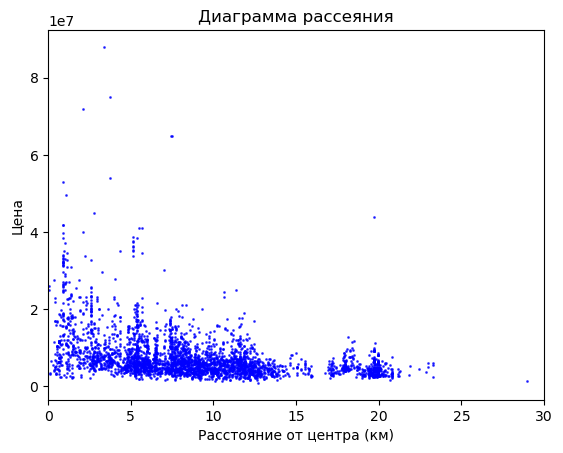

In [8]:
ax = data.plot(kind='scatter', 
              x='center_distance', 
              y='Цена', 
              color='blue', 
              s=1, 
              alpha=0.7, 
              )

plt.title('Диаграмма рассеяния')
plt.xlabel('Расстояние от центра (км)')
plt.ylabel('Цена')

plt.xlim(0, 30)  

plt.xticks(range(0, 31, 5)) 

plt.show()

In [9]:
data['Район'].unique()

array([nan, 'Октябрьский район', 'Железнодорожный район',
       'Самарский район', 'р-н Кировский', 'Советский район',
       'Ленинский район', 'Кировский район', 'р-н Красноглинский',
       'р-н Самарский', 'р-н Куйбышевский', 'Промышленный район',
       'р-н Промышленный', 'р-н Октябрьский', 'р-н Железнодорожный',
       'Куйбышевский район', 'Красноглинский район'], dtype=object)

In [10]:
district_mapping = {
    'Октябрьский район': 'Oktyabrsky',
    'р-н Октябрьский': 'Oktyabrsky',
    'Железнодорожный район': 'Zheleznodorozhny',
    'р-н Железнодорожный': 'Zheleznodorozhny',
    'Самарский район': 'Samarsky',
    'р-н Самарский': 'Samarsky',
    'Кировский район': 'Kirovsky',
    'р-н Кировский': 'Kirovsky',
    'Советский район': 'Sovetsky',
    'Ленинский район': 'Leninsky',
    'Красноглинский район': 'Krasnoglinsky',
    'р-н Красноглинский': 'Krasnoglinsky',
    'Куйбышевский район': 'Kuibyshevsky',
    'р-н Куйбышевский': 'Kuibyshevsky',
    'Промышленный район': 'Promyshlenny',
    'р-н Промышленный': 'Promyshlenny'
}

# Функция для замены названий
def standardize_district(name):
    if pd.isna(name):
        return np.nan
    return district_mapping.get(name, name)  

data['Район'] = data['Район'].apply(standardize_district)

In [11]:
data.groupby('Район').agg({'id':'count'})

,id
Район,
Kirovsky,692
Krasnoglinsky,397
Kuibyshevsky,289
Leninsky,176
Oktyabrsky,661
Promyshlenny,540
Samarsky,105
Sovetsky,412
Zheleznodorozhny,253


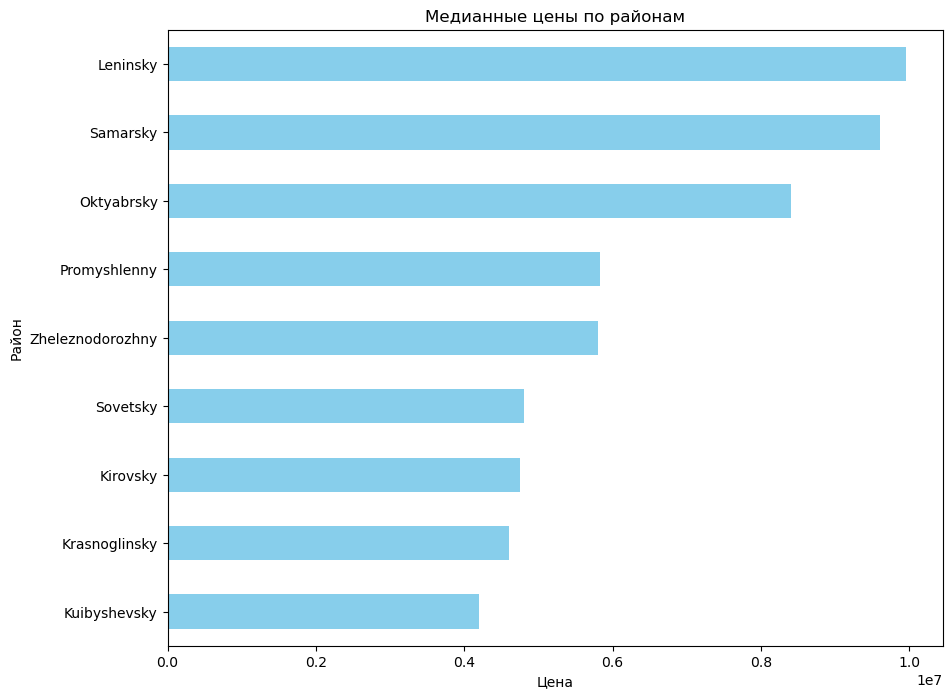

In [12]:
plt.figure(figsize=(10, 8))
data.groupby('Район')['Цена'].median().sort_values().plot(
    kind='barh',
    color='skyblue'
)
plt.title('Медианные цены по районам')
plt.xlabel('Цена')
plt.ylabel('Район')
plt.show()

/home/adminuser/anaconda3/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


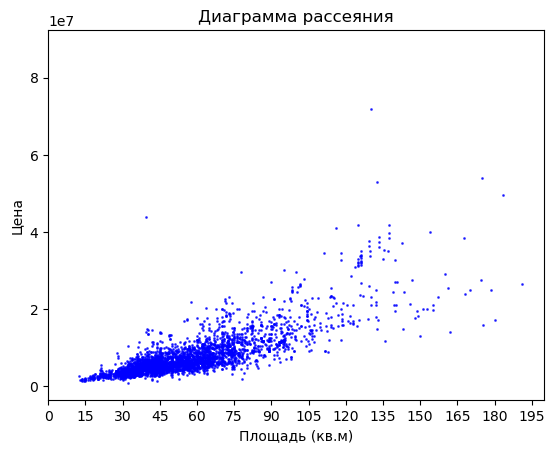

In [13]:
ax = data.plot(kind='scatter', 
              x='Общая площадь', 
              y='Цена', 
              color='blue', 
              s=1, 
              alpha=0.7, 
              )

plt.title('Диаграмма рассеяния')
plt.xlabel('Площадь (кв.м)')
plt.ylabel('Цена')

plt.xlim(0, 200)  

plt.xticks(range(0, 201, 15)) 

plt.show()

In [14]:
metro_coords = pd.read_json('./metro_coords.json')
# metro_coords = metro_coords.to_dict()

In [15]:
from geopy.distance import geodesic
import pandas as pd

def nearest_metro_dist(longitude, latitude, metro_df):
    if pd.isna(longitude) or pd.isna(latitude):
        return None
    
    min_dist = float('inf')
    
    for _, metro_row in metro_df.iterrows():
        try:
            dist = geodesic(
                (latitude, longitude),
                (metro_row['latitude'], metro_row['longitude'])
            ).kilometers
            
            if dist < min_dist:
                min_dist = dist
        except:
            continue
    
    return round(min_dist, 2) if min_dist != float('inf') else None

In [16]:
data['metro_distance'] = data.apply(
    lambda x: nearest_metro_dist(x['longitude'], x['latitude'], metro_coords),
    axis=1
)

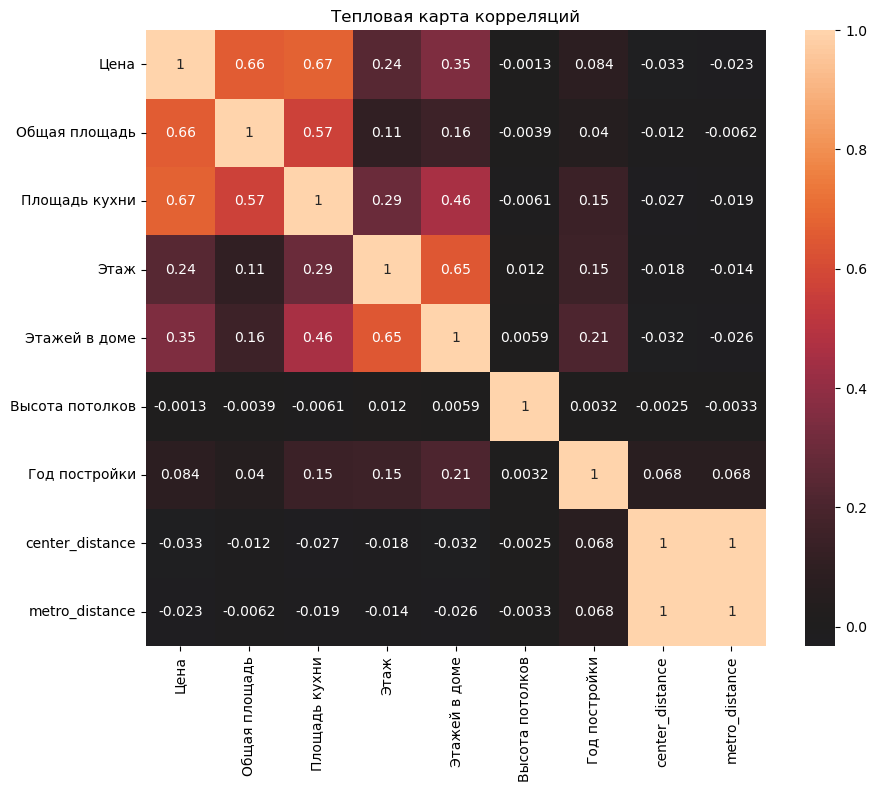

In [17]:
corr_matrix = data.drop(['id','longitude','latitude','Цена за кв.метр','Жилая площадь'],axis=1).corr()  # матрица корреляций Пирсона

plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_matrix, annot=True, cmap='icefire', center=0)
plt.title('Тепловая карта корреляций')
plt.show()

/home/adminuser/anaconda3/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


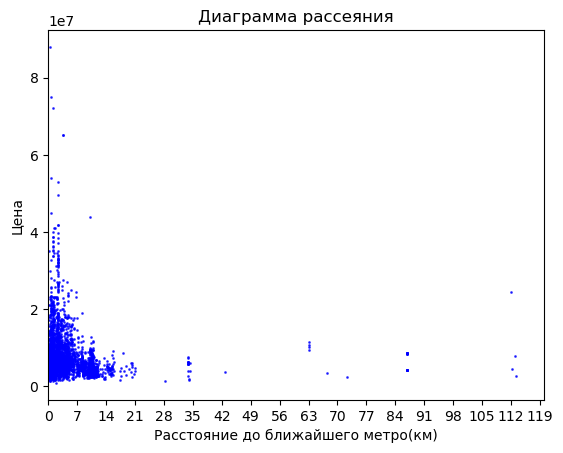

In [18]:
ax = data.plot(kind='scatter', 
              x='metro_distance', 
              y='Цена', 
              c='blue', 
              s=1, 
              alpha=0.7, 
              )

plt.title('Диаграмма рассеяния')
plt.xlabel('Расстояние до ближайшего метро(км)')
plt.ylabel('Цена')

plt.xlim(0, 120)  

plt.xticks(range(0, 121, 7)) 
plt.show()

In [19]:
from scipy import stats

In [20]:
data['metro_distance'] = data['metro_distance'].fillna(data['metro_distance'].median())

threshold = data['metro_distance'].median() 

group1 = data[data['metro_distance'] < threshold]['Цена']  # Близко к метро
group2 = data[data['metro_distance'] >= threshold]['Цена'] # Далеко от метро

stats.ttest_ind(group1, group2, equal_var=False)

TtestResult(statistic=12.75722255363644, pvalue=2.9075997325812926e-36, df=2774.5487866437934)

*По результатам t-теста видно, что фича значимая*

In [21]:
data['center_distance'] = data['center_distance'].fillna(data['center_distance'].median())

threshold = data['center_distance'].median() 

group1 = data[data['center_distance'] < threshold]['Цена']  # Близко к метро
group2 = data[data['center_distance'] >= threshold]['Цена'] # Далеко от метро

stats.ttest_ind(group1, group2, equal_var=False)

TtestResult(statistic=21.230224332361217, pvalue=1.42757691735035e-91, df=2324.9710570635048)

*По результатам t-теста видно, что расстояние от центра влияет больше, чем расстояние от ближайшего метро*